In [83]:
import numpy as np
from scipy.signal import fftconvolve

def wiener_filter(signal, noise, window):
    # Compute the PSD of the signal and the noise
    signal_psd = np.abs(np.fft.fft(signal * window)) ** 2
    noise_psd = np.abs(np.fft.fft(noise * window)) ** 2

    # Compute the CPSD between the signal and the noise
    cpsd = np.fft.fft(signal * window) * np.conj(np.fft.fft(noise * window))

    # Compute the transfer function of the Wiener filter
    transfer_function = cpsd / (cpsd + noise_psd)

    # Apply the transfer function to the signal using convolution
    filtered_signal = fftconvolve(signal * window, transfer_function, mode='same')

    return filtered_signal / np.max(np.abs(filtered_signal))


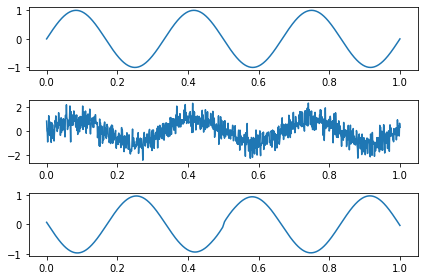

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal with a sinusoidal component
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 3 * t)

# Generate a noise signal with a flat PSD
noise = np.random.normal(0, 0.5, size=1000)

# Apply a window function to reduce spectral leakage
window = np.kaiser(1000, 0.1)

# Apply the Wiener filter to the signal
filtered_signal = wiener_filter(signal, noise, window)

# Plot the original signal, the noisy signal, and the filtered signal
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.subplot(3, 1, 2)
plt.plot(t, signal + noise, label='Noisy Signal')
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.tight_layout()
plt.show()

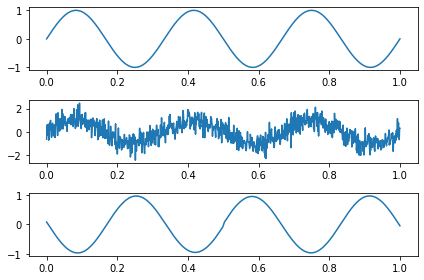

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal with a sinusoidal component
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 3 * t)

# Generate a noise signal with a flat PSD
noise = np.random.normal(0, 0.5, size=1000)
noise2 = np.random.normal(0.1, 0.8, size=1000)

# Apply a window function to reduce spectral leakage
window = np.kaiser(1000, 0.1)

# Apply the Wiener filter to the signal
filtered_signal = wiener_filter(signal, noise2, window)

# Plot the original signal, the noisy signal, and the filtered signal
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.subplot(3, 1, 2)
plt.plot(t, signal + noise, label='Noisy Signal')
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.tight_layout()
plt.show()

In [86]:
s1 = np.sin(2 * np.pi * t)
s2 = np.sin(2 * np.pi *2* t)
s3 = np.sin(2 * np.pi *3* t)

In [87]:
m = s1+s2+s3

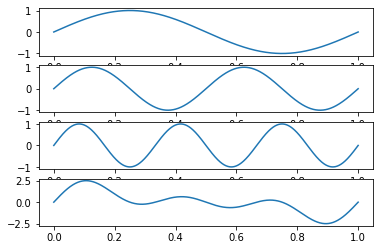

In [88]:
plt.subplot(4, 1, 1)
plt.plot(t, s1, label='Source1 Signal')
plt.subplot(4, 1, 2)
plt.plot(t, s2, label='Source2 Signal')
plt.subplot(4, 1, 3)
plt.plot(t, s3, label='Source3 Signal')
plt.subplot(4, 1, 4)
plt.plot(t, m, label='Mixture Signal')
plt.show()

In [89]:
x1 = np.sin(2 * np.pi * t) + 0.1 * s2 + 0.1 *s3
x2 = np.sin(2 * np.pi *2* t) + 0.1 * s1 + 0.1 * s3
x3 = np.sin(2 * np.pi *3* t) + 0.1 * s1 + 0.1 * s2
mb = x1+x2+x3

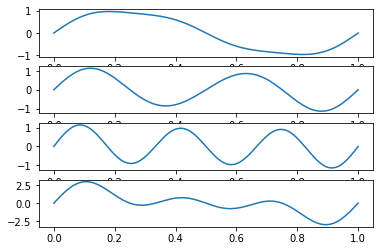

In [90]:
plt.subplot(4, 1, 1)
plt.plot(t, x1, label='Source1 bleed')
plt.subplot(4, 1, 2)
plt.plot(t, x2, label='Source2 bleed')
plt.subplot(4, 1, 3)
plt.plot(t, x3, label='Source3 bleed')
plt.subplot(4, 1, 4)
plt.plot(t, mb, label='Mixture bleed')
plt.show()

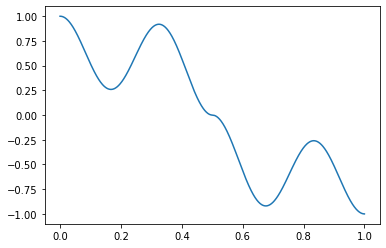

In [91]:
# Apply a window function to reduce spectral leakage
window = np.kaiser(1000, 0.01)

# Apply the Wiener filter to the signal
filtered_signal = wiener_filter(x3, (0.1 * s1 + 0.1 *s2), window)
plt.plot(t, filtered_signal, label='Removed bleed')
plt.show()